In [13]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
from gensim.models.fasttext import load_facebook_model
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

## Consultant 데이터 전처리

In [2]:
consultant = pd.read_excel('./Consultant.xlsx')
consultant = consultant.set_index(keys = ['상담자 데이터 예시'])
consultant.columns = ['major','univ_name','company','company_sector','company_local']

# (label=4) 제거
for cols in range(len(consultant)):
    for rows in range(len(consultant)):
        print(consultant.iloc[rows,cols])
        consultant.iloc[rows,cols] = re.sub(r'\({1}.+\){1}','',consultant.iloc[rows,cols])
        print(consultant.iloc[rows,cols])

산업공학과(label=4)
산업공학과
컴퓨터공학(label=0)
컴퓨터공학
화학공학과(label=1)
화학공학과
화학과(label=2)
화학과
신소재 공학과(label = 3)
신소재 공학과
인천대학교(label = 0)
인천대학교
부산대학교(label = 2)
부산대학교
인천대학교(label = 0)
인천대학교
서울대학교(label = 1)
서울대학교
서울대학교(label = 1)
서울대학교
LG이노텍(label = 6)
LG이노텍
네이버(label = 1)
네이버
S-Oil(label = 2)
S-Oil
	SK (label = 3)
	SK 
현대제철(label = 5)
현대제철
IT
IT
IT
IT
에너지
에너지
에너지
에너지
소재
소재
서울특별시 강서구 (label = 5)
서울특별시 강서구 
경기도 성남시 분당구 (label = 0)
경기도 성남시 분당구 
서울특별시 마포구(label = 1)
서울특별시 마포구
서울특별시 종로구(label = 2)
서울특별시 종로구
인천광역시 동구(label = 4)
인천광역시 동구


In [3]:
consultant

,major,univ_name,company,company_sector,company_local
상담자 데이터 예시,,,,,
1,산업공학과,인천대학교,LG이노텍,IT,서울특별시 강서구
2,컴퓨터공학,부산대학교,네이버,IT,경기도 성남시 분당구
3,화학공학과,인천대학교,S-Oil,에너지,서울특별시 마포구
4,화학과,서울대학교,\tSK,에너지,서울특별시 종로구
5,신소재 공학과,서울대학교,현대제철,소재,인천광역시 동구


In [4]:
user = pd.read_excel('./user.xlsx')
user = user.dropna(axis = 0)
user = user.set_index(keys = ['학생 데이터 예시'])
user.index = [1,2,3,4,5]
user.columns = ['major','univ_name','company','company_sector','company_local']
user.index.name = "학생 데이터 예시"

# (label=4) 제거
for cols in range(len(consultant)):
    for rows in range(len(consultant)):
        print(user.iloc[rows,cols])
        user.iloc[rows,cols] = re.sub(r'\({1}.+\){1}','',user.iloc[rows,cols])
        print(user.iloc[rows,cols])

컴퓨터공학(label=0)
컴퓨터공학
컴퓨터공학(label=0)
컴퓨터공학
화학공학과(label=1)
화학공학과
화학과(label=2)
화학과
신소재 공학과(label = 3)
신소재 공학과
인천대학교(label = 0)
인천대학교
서울대학교(label = 1)
서울대학교
인천대학교(label = 0)
인천대학교
서울대학교(label = 1)
서울대학교
부산대학교(label = 2)
부산대학교
카카오(label = 0)
카카오
네이버(label = 1)
네이버
S-Oil(label = 2)
S-Oil
	SK (label = 3)
	SK 
LG화학(label = 4)
LG화학
IT
IT
IT
IT
에너지
에너지
에너지
에너지
소재
소재
경기도 성남시 분당구 (label = 0) 
경기도 성남시 분당구  
경기도 성남시 분당구 (label = 0)
경기도 성남시 분당구 
서울특별시 마포구(label = 1)
서울특별시 마포구
서울특별시 종로구(label = 2)
서울특별시 종로구
서울특별시 영등포구(label = 3)
서울특별시 영등포구


In [5]:
user.iloc[3,2]=user.iloc[3,2].strip()

In [6]:
user

,major,univ_name,company,company_sector,company_local
학생 데이터 예시,,,,,
1,컴퓨터공학,인천대학교,카카오,IT,경기도 성남시 분당구
2,컴퓨터공학,서울대학교,네이버,IT,경기도 성남시 분당구
3,화학공학과,인천대학교,S-Oil,에너지,서울특별시 마포구
4,화학과,서울대학교,SK,에너지,서울특별시 종로구
5,신소재 공학과,부산대학교,LG화학,소재,서울특별시 영등포구


In [7]:
model = load_facebook_model('./cc.en.300.bin')
model

In [146]:
tmp_list = ['Department of Computer Engineering',
            'Department of Chemical Engineering',
            'Department of Chemistry',
            'Department of Materials Science and Engineering',
            'Department of Industrial Engineering',
            'Department of Economics',
            'Department of Business Administration']

In [147]:
tmp_list

['Department of Computer Engineering',
 'Department of Chemical Engineering',
 'Department of Chemistry',
 'Department of Materials Science and Engineering',
 'Department of Industrial Engineering',
 'Department of Economics',
 'Department of Business Administration']

In [148]:
major_dict = {}
idx_dense_dict = {}

for cnt,tmp in enumerate(tmp_list):
    major_dict[tmp] = cnt
    idx_dense_dict[cnt] = model.wv[tmp]
idx_dense_dict

{0: array([ 8.46798532e-03,  8.93554464e-03,  2.27772095e-03,  3.54104787e-02,
        -5.87391388e-03, -2.06489507e-02, -1.01574901e-02,  1.22900037e-02,
         4.51205112e-03, -6.11841446e-04,  2.19072327e-02,  2.29728594e-03,
         5.89927332e-03,  8.82883836e-03, -1.47178555e-02, -3.26196216e-02,
         1.20772794e-02,  1.01743955e-02, -2.70034932e-03,  3.39918956e-02,
        -1.83842145e-02,  8.01521121e-04, -1.69505142e-02, -5.76818176e-03,
         2.58264542e-02,  2.79782210e-02,  4.87041567e-03,  1.13715623e-02,
         6.80745533e-03,  1.32676903e-02,  1.67918031e-03, -3.12350551e-03,
         3.89785133e-03,  7.83218443e-03,  1.76899768e-02, -4.75810142e-03,
         7.41022220e-03,  2.12151334e-02, -1.02857957e-02,  7.05441879e-03,
         2.48560659e-03, -1.18935443e-02,  1.39538366e-02,  3.56822275e-03,
        -9.93252266e-03, -1.42284832e-03,  3.49134742e-03,  8.09758063e-03,
        -7.40201352e-03, -9.39699449e-03,  2.23850124e-02, -8.88478290e-03,
         

### DBSCAN은 feature 간 거리를 기준으로 클러스터를 구성하는 알고리즘으로 정규화가 필수적이다.
### But 여기서는 cosine 유사도를 사용

In [149]:
random_list = [random.randint(1,6) for i in range(100)]
random_list

[4,
 4,
 2,
 2,
 1,
 5,
 5,
 6,
 6,
 3,
 4,
 5,
 5,
 6,
 6,
 5,
 4,
 6,
 3,
 2,
 3,
 4,
 3,
 2,
 2,
 2,
 5,
 2,
 3,
 3,
 1,
 3,
 3,
 6,
 6,
 6,
 4,
 4,
 4,
 6,
 6,
 4,
 6,
 3,
 2,
 4,
 4,
 6,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 3,
 6,
 6,
 5,
 4,
 2,
 3,
 2,
 4,
 1,
 1,
 1,
 2,
 2,
 6,
 1,
 1,
 4,
 3,
 5,
 6,
 2,
 5,
 2,
 1,
 4,
 2,
 6,
 3,
 2,
 1,
 3,
 2,
 6,
 6,
 3,
 5,
 4,
 1,
 1,
 5,
 5,
 2,
 6,
 6]

In [150]:
random_list2 = [idx_dense_dict[random_num] for random_num in random_list]
random_array = np.array(random_list2)
random_array[:2]

array([[-1.22488360e-03,  3.35783255e-03, -5.43702859e-03,
         5.46832941e-02,  5.40822977e-04, -5.01868036e-03,
        -6.97988039e-03, -6.89806882e-04, -1.30391167e-03,
        -6.53470517e-04,  1.20610259e-02, -3.08181532e-03,
         1.05056604e-02,  6.04244298e-04,  5.35338745e-03,
        -3.83721851e-02,  1.17382146e-02,  3.17678531e-03,
         5.06610051e-03,  4.06019576e-02, -2.12106351e-02,
         4.23910213e-04, -1.00946687e-02,  6.63716628e-06,
         1.72391571e-02,  2.09441893e-02, -1.10458517e-02,
         8.29579309e-03, -8.52483383e-04,  9.47378296e-03,
         4.81771678e-03, -1.37897243e-03,  1.46342199e-02,
        -1.38556794e-03,  1.52314985e-02, -3.74312839e-03,
        -3.89441359e-03,  1.11706331e-02, -1.33764436e-02,
         1.12286862e-02,  2.80692847e-03, -1.28662921e-02,
         1.08912187e-02,  4.02535684e-03, -1.52206980e-02,
         1.03801293e-02,  1.33701833e-02,  1.40147638e-02,
        -8.54838639e-03,  2.54152482e-03,  2.14242879e-0

In [151]:
random_array.shape

(100, 300)

In [152]:
dbscan = DBSCAN(eps=0.15,min_samples = 2, metric = "cosine")

In [153]:
predict_array = dbscan.fit_predict(random_array)

In [154]:
predict_array

array([0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 0, 2, 2, 3, 3, 2, 0, 3, 4, 1, 4, 0,
       4, 1, 1, 1, 2, 1, 4, 4, 1, 4, 4, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 4,
       1, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 2, 0, 1, 4, 1, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 0, 4, 2, 3, 1, 2, 1, 1, 0, 1, 3, 4, 1, 1, 4, 1,
       3, 3, 4, 2, 0, 1, 1, 2, 2, 1, 3, 3])

In [155]:
np.array(random_list)

array([4, 4, 2, 2, 1, 5, 5, 6, 6, 3, 4, 5, 5, 6, 6, 5, 4, 6, 3, 2, 3, 4,
       3, 2, 2, 2, 5, 2, 3, 3, 1, 3, 3, 6, 6, 6, 4, 4, 4, 6, 6, 4, 6, 3,
       2, 4, 4, 6, 1, 2, 2, 2, 2, 1, 1, 3, 6, 6, 5, 4, 2, 3, 2, 4, 1, 1,
       1, 2, 2, 6, 1, 1, 4, 3, 5, 6, 2, 5, 2, 1, 4, 2, 6, 3, 2, 1, 3, 2,
       6, 6, 3, 5, 4, 1, 1, 5, 5, 2, 6, 6])

In [156]:
cosine_similarity(idx_dense_dict[5].reshape(1,-1),idx_dense_dict[6].reshape(1,-1))

array([[0.7422373]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


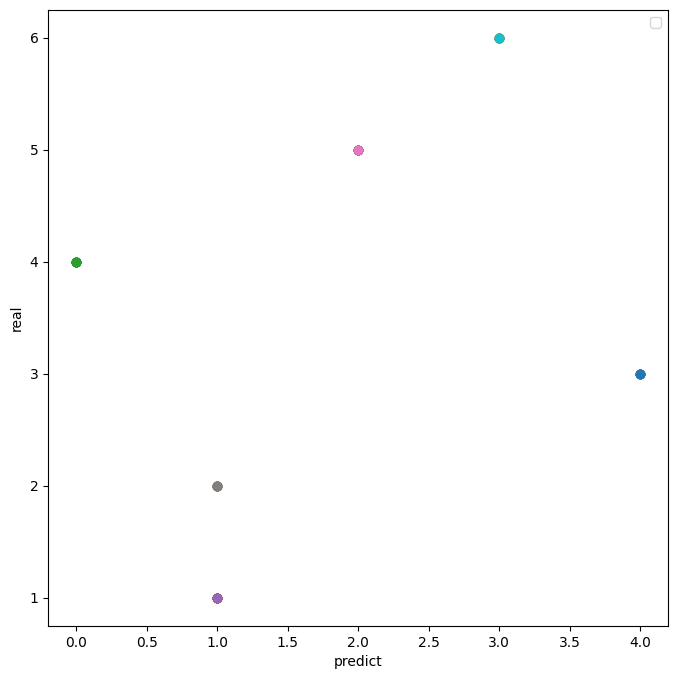

In [157]:
plt.figure(figsize = (8, 8))
for i in range(100):
    plt.scatter(predict_array[i],random_list[i])
plt.xlabel("predict")
plt.ylabel("real")
plt.legend()

In [158]:
major_dict

{'Department of Computer Engineering': 0,
 'Department of Chemical Engineering': 1,
 'Department of Chemistry': 2,
 'Department of Materials Science and Engineering': 3,
 'Department of Industrial Engineering': 4,
 'Department of Economics': 5,
 'Department of Business Administration': 6}

* 결과 군집으로 묶인 것을 확인해보면 Chemical Engineering과 Chemistry가 묶인 것을 확인 할 수 있고 Computer Engineering, Industrial Engineering, Materials Science and Engineering,Economics,BA는 묶이지 않은 것을 확인할 수 있다.